## Logistic Regression
Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.


#### Sigmoid funtion


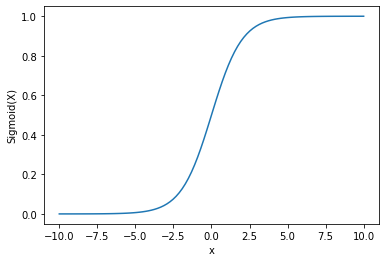

In [2]:
# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show()

The task in our first practical example is to build a simple logistic regression model to determine whether a candidate’s application will get accepted and approved for admission into Harvard university or if it should be rejected.

So, the two possible outcomes are:

Application Accepted and Approved for Admission, which can be represented by the value of ‘1’

and

Application Rejected, which can be represented by the value of ‘0’.

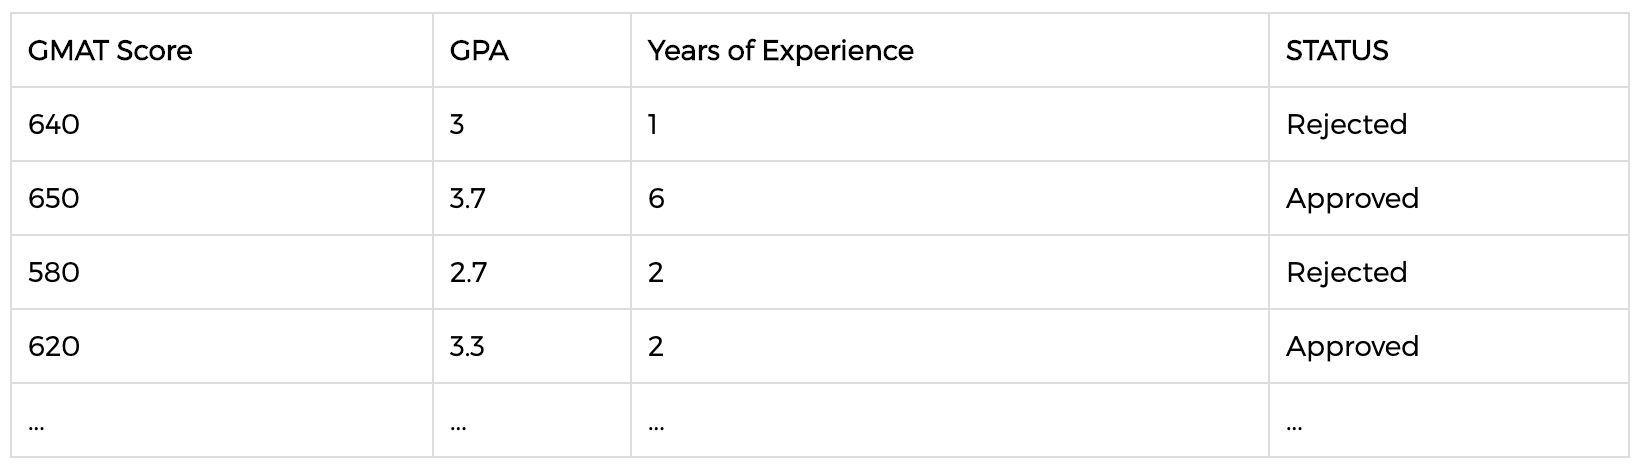

In [5]:
import pandas as pd
application = {'APPLICATION_NBR': ['oJCvIoTB', 'q4ICdH0f', '34EK9wXH', 'T83EGu9A', 'tpGQZJDm', 'zHbdj4hS', 'AodXvUsc', 'QE3wAy9T', 'gBa6psw3', 'X7H38FHe', 'iwVeBGu3', 'AMc5dykm', 'cAJ0MbEh', 'sXoTwUHx', 'Fsv0RQA3', 'mJXu1o6R', 'xL3EDeGa', 'c0Ed7hbm', 'LInGqJ59', 'lSKXvwGK', 'xTlGMUG2', 'DvZ2TcBB', 'm67QrLB0', '2YuxgSLF', 'jUHD7lQg', 'Df38sD1D', 'uBewE4el', 'yQduYqfd', 'xs1TTyDO', 'HNHSkiLV', 'DSvTzs8J', 'pIboghkI', 'wL2gVzRP', 'gaR3nmER', 'kfZWQwyh', 'kcDoPfu1', 'GHDbDtEE', 'sZv1NmY5', '68lmOgBL', 'jGjMFKRV', 'GHDbDtFE', 'sZ31NmY5', '682mOgbL', 'jGjMFLRV'],
              'GMAT_SCORE': [640, 650, 580, 620, 780, 750, 690, 710, 680, 730, 690, 720, 740, 690, 610, 690, 710, 680, 770, 610, 580, 650, 540, 590, 620, 600, 550, 550, 570, 670, 660, 580, 650, 660, 640, 620, 660, 660, 680, 650, 670, 580, 590, 690], 
              'GPA': [3, 3.7, 2.7, 3.3, 4, 3.9, 3.3, 3.7, 3.9, 3.7, 2.3, 3.3, 3.3, 1.7, 2.7, 3.7, 3.7, 3.3, 3.3, 3, 2.7, 3.7, 2.7, 2.3, 3.3, 2, 2.3, 2.7, 3, 3.3, 3.7, 2.3, 3.7, 3.3, 3, 2.7, 4, 3.3, 3.3, 2.3, 2.7, 3.3, 1.7, 3.7], 
              'EXPERIENCE': [1, 6, 2, 2, 3, 4, 3, 5, 4, 6, 1, 4, 5, 1, 3, 5, 6, 4, 3, 1, 4, 6, 2, 3, 2, 1, 4, 1, 2, 6, 4, 2, 6, 5, 1, 2, 4, 6, 5, 1, 2, 1, 4, 5], 
              'STATUS': ['Rejected', 'Approved', 'Rejected', 'Approved', 'Approved', 'Approved', 'Rejected', 'Approved', 'Rejected', 'Approved', 'Rejected', 'Approved', 'Approved', 'Rejected', 'Rejected', 'Approved', 'Approved', 'Rejected', 'Approved', 'Rejected', 'Rejected', 'Approved', 'Rejected', 'Rejected', 'Approved', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Approved', 'Approved', 'Rejected', 'Approved', 'Approved', 'Rejected', 'Rejected', 'Approved', 'Approved', 'Approved', 'Rejected', 'Rejected', 'Rejected', 'Rejected', 'Approved']
              }


#### Import the required library

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

/Users/enayat/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Create dataframe based on data

In [12]:
df = pd.DataFrame(application,columns= ['APPLICATION_NBR', 'GMAT_SCORE', 'GPA','EXPERIENCE','STATUS'])

### create a binary number based on nominal target variable

In [13]:
df["STATUS"].replace({"Rejected": "0", "Approved": "1"}, inplace=True)
df['STATUS']=df['STATUS'].astype('int64')
df.dtypes

APPLICATION_NBR     object
GMAT_SCORE           int64
GPA                float64
EXPERIENCE           int64
STATUS               int64
dtype: object

In [14]:
df.head()

,APPLICATION_NBR,GMAT_SCORE,GPA,EXPERIENCE,STATUS
0,oJCvIoTB,640,3.0,1,0
1,q4ICdH0f,650,3.7,6,1
2,34EK9wXH,580,2.7,2,0
3,T83EGu9A,620,3.3,2,1
4,tpGQZJDm,780,4.0,3,1


In [15]:
X = df[['GMAT_SCORE', 'GPA','EXPERIENCE']]
y = df['STATUS']
display(X.shape, y.shape)

(44, 3)

(44,)

### Divide the dataset into two parts: train & test

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33, 3)

(33,)

(11, 3)

(11,)

### Create logistic regression model

In [22]:
lr = LogisticRegression(fit_intercept = False, C = 1e9)
lr.fit(X_train,y_train)

/Users/enayat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict the test dataset

In [23]:
y_pred=lr.predict(X_test)

In [24]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

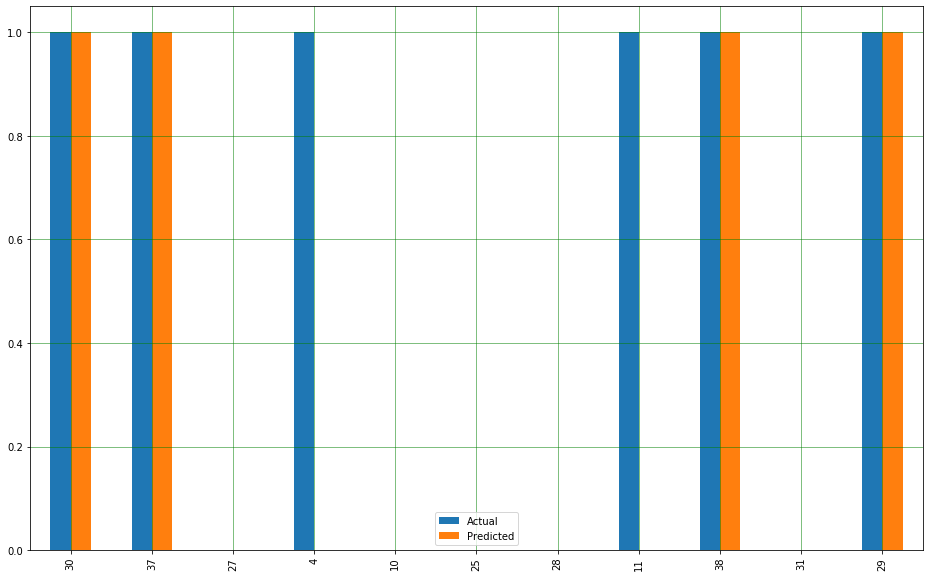

In [25]:
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df1 = df.head(25)
# df1.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()


### Create coeffecient matrix

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 0],
       [2, 4]])

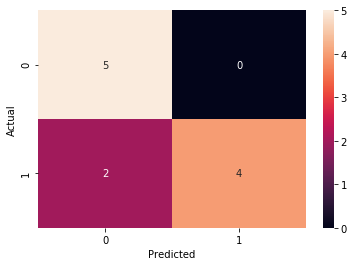

In [27]:
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cnf_matrix, annot=True)


In [28]:
accuracyScore = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ',accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%')

Accuracy Score :  0.8181818181818182
Accuracy In Percentage :  81 %


### Predict a new value (new record)

In [29]:
new_application = {'GMAT_SCORE': [680],
                  'GPA': [3.3],
                  'EXPERIENCE': [6]
                  }
				  
df2 = pd.DataFrame(new_application,columns= ['GMAT_SCORE', 'GPA','EXPERIENCE'])	
y_pred=lr.predict(df2)
print(y_pred)

[1]


### Coefficient, Intercepts, Standard error, and the other model evaluation metrics

In [30]:
# Using sklearn
print(lr.coef_, lr.intercept_)
# -0.019 * GMAT_SCORE + 2.88 * GPA + 0.89 * EXPERIENCE 

[[-0.01899684  2.87720034  0.89931631]] 0.0


To interpret logistic regression models, we examine several numbers that most software packages provide in their reports:
- Coefficient (Greek symbol beta - ß): one coefficient per input variable plus one constant (bias term).
- Standard error of the coefficient (SE): A measure of certainty of the coefficient found by logistic regression. Smaller values of standard error imply a smaller level of uncertainty of the coefficient value.
- Confidence Interval (CI): The range of values the coefficient is expected to fall between. The CI is computed as: CI=β±SE


In [31]:
import statsmodels.discrete.discrete_model as sm

# sm
logit = sm.Logit(y_train.astype(float), X_train.astype(float))
log_model=logit.fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.398648
         Iterations 7


/Users/enayat/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 STATUS   No. Observations:                   33
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Nov 2020   Pseudo R-squ.:                  0.4214
Time:                        12:46:49   Log-Likelihood:                -13.155
converged:                       True   LL-Null:                       -22.737
Covariance Type:            nonrobust   LLR p-value:                 6.896e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GMAT_SCORE    -0.0190      0.008     -2.525      0.012      -0.034      -0.004
GPA            2.8819      1.445      1.994      0.046       0.050       5.714
EXPERIENCE     0.8998      0.383      2.348      0.019       0.149       1.651
==============================================================================
"""